In [5]:
import os, sys
sys.path.insert(0, os.path.abspath('..'))
import numpy as np 
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.optimize import linprog
import IESDS
import order_k
import BFPSNS
import Linear_programming
import support_enumeration as se

import nashpy as nash


## 1.

In [6]:
# Parametre
gamma1 = 1.0
gamma2 = 1/10

def demand(pi, pj):
    num = np.exp(2 - pi)
    denom = 1 + np.exp(2 - pi) + np.exp(2 - pj)
    return num / denom

def cost(q, gamma1=gamma1, gamma2=gamma2):
    return gamma1 * q + gamma2 * np.exp(q)

def profit(pi, pj, gamma1=gamma1, gamma2=gamma2):
    q_i = demand(pi, pj)
    return q_i * (pi - cost(q_i, gamma1=gamma1, gamma2=gamma2))

# Eksempel på simultant prisvektor (startværdi)
p0 = np.array([0.5, 0.5])

Symmetric Nash price: p* ≈ 2.2327
Symmetric Nash price: p* ≈ 2.2327
Symmetric profit: π* ≈ 0.5488


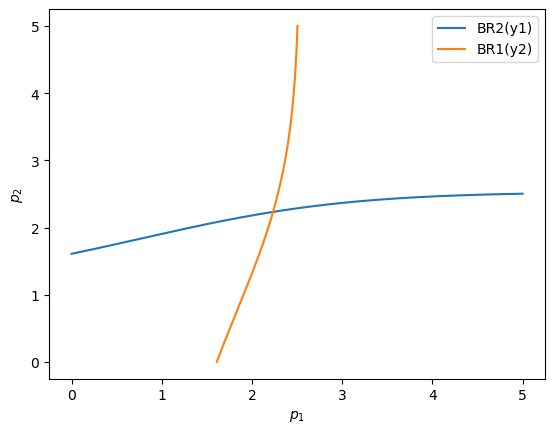

In [7]:
from scipy.optimize import fsolve
# NASH for demand function a
from scipy.optimize import minimize

def BR2(p1): 
    f = lambda p2 : -profit(pi=p2, pj=p1)
    res = minimize(f, p0[1])
    p2 = res.x[0]
    return p2
    
def BR1(p2):
    f = lambda p1 : -profit(pi=p1, pj=p2)
    res = minimize(f, p0[0])
    p1 = res.x[0]
    return p1

pp = np.linspace(0., 5., 200)
pp1_a = np.empty(pp.shape)
pp2_a = np.empty(pp.shape)
for i,p in enumerate(pp): 
    pp1_a[i] = BR1(p)
    pp2_a[i] = BR2(p)

plt.plot(pp, pp2_a, label=f'BR2(y1)')
plt.plot(pp1_a, pp, label=f'BR1(y2)')
plt.legend(); 
plt.xlabel('$p_1$');
plt.ylabel('$p_2$');

def eq1(p):
    return p - BR1(p)

def eq2(p):
    return p - BR2(p)

# find p*
p_star1, = fsolve(eq1, 0.5)
p_star2, = fsolve(eq2, 0.5)
print(f"Symmetric Nash price: p* ≈ {p_star1:.4f}")
print(f"Symmetric Nash price: p* ≈ {p_star2:.4f}")
print(f"Symmetric profit: π* ≈ {profit(p_star1, p_star2):.4f}")

## 2.

In [9]:
def cartel_profit_a(x):
    p1, p2 = x
    return profit(p1, p2) + profit(p2, p1)

f = lambda x : -cartel_profit_a(x)
res_a = minimize(f, p0)

print(res_a.x)

[2.6789209 2.6789209]


## 3.

In [12]:
#Profit i samarbejdsstadiet
print(profit(2.6789,2.6789))

#Profit i nashstadiet
print(profit(2.2327,2.2327))

#Profit i afvigelse for demand function a
from scipy.optimize import minimize_scalar

p_c = 2.6789

res_hat = minimize_scalar(
    lambda p: -profit(pi=p, pj=p_c),
    bounds=(0, 5),
    method='bounded'
)
print("Optimal price ved afvigelse:", res_hat.x)
pi_hat = profit(res_hat.x, pj=p_c)
pi_hat2 = profit(p_c, pj=res_hat.x)
print("Optimal pi ved afvigelse:", pi_hat)
print("Optimal pi ved afvigelse:", pi_hat2)

minimum_delta = (0.6036-0.5787)/(0.6036-0.5488)
print("Minimum delta for cooperation:", minimum_delta)

0.5787152317661052
0.5488240367649131
Optimal price ved afvigelse: 2.3177448175812914
Optimal pi ved afvigelse: 0.6036073421321408
Optimal pi ved afvigelse: 0.5279465111841259
Minimum delta for cooperation: 0.45437956204379565


## 4.

c:\Users\elias\anaconda3\Lib\site-packages\scipy\optimize\_minpack_py.py:177: RuntimeWarning: The iteration is not making good progress, as measured by the 
  improvement from the last ten iterations.
  warnings.warn(msg, RuntimeWarning)


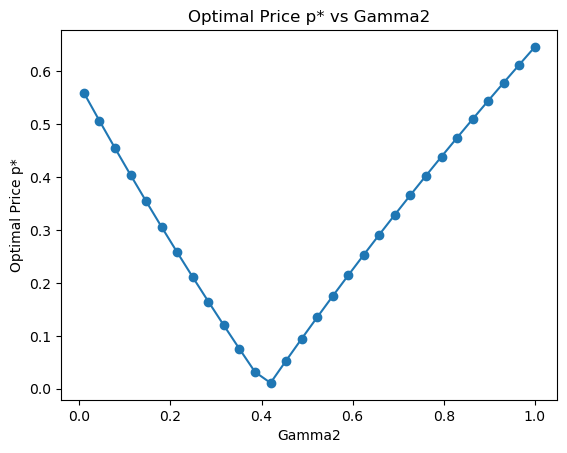

Optimal gamma2: 0.4197
Optimal gamma2 (scalar method): 0.4108


In [25]:
gamma1_new = 1/10
def find_gamma_2(gamma2):
    def BR2(p1): 
        f = lambda p2 : -profit(pi=p2, pj=p1, gamma1=gamma1_new, gamma2=gamma2)
        res = minimize(f, p0[1])
        p2 = res.x[0]
        return p2
        
    def BR1(p2):
        f = lambda p1 : -profit(pi=p1, pj=p2, gamma1=gamma1_new, gamma2=gamma2)
        res = minimize(f, p0[0])
        p1 = res.x[0]
        return p1
    
    def eq1(p):
        return p - BR1(p)

    # def eq2(p):
    #     return p - BR2(p)

    # find p*
    p_star1, = fsolve(eq1, 0.5)
    # p_star2, = fsolve(eq2, 0.5)
    # print(f"Symmetric Nash price: p* ≈ {p_star1:.4f}")
    # print(f"Symmetric Nash price: p* ≈ {p_star2:.4f}")
    # print(f"Symmetric profit: π* ≈ {profit(p_star1, p_star2):.4f}")
    return np.abs(2.2327 - p_star1)

# Test different values of gamma2
gamma2_values = np.linspace(0.01, 1.0, 30)
p_star_values = [find_gamma_2(g) for g in gamma2_values]
plt.plot(gamma2_values, p_star_values, marker='o')
plt.xlabel('Gamma2')
plt.ylabel('Optimal Price p*')
plt.title('Optimal Price p* vs Gamma2')
plt.show()


# Find the optimal gamma2 that minimizes the difference
optimal_gamma2 = gamma2_values[np.argmin(p_star_values)]

# Find the optimal gamma 2 that minimizes the difference with minize_scalar
optimal_gamma2_scalar = minimize_scalar(find_gamma_2, bounds=(0.01, 1.0), method='bounded').x
print(f"Optimal gamma2: {optimal_gamma2:.4f}")
print(f"Optimal gamma2 (scalar method): {optimal_gamma2_scalar:.4f}")

In [26]:
gamma2_new = 0.4108
def cartel_profit_a(x):
    p1, p2 = x
    return profit(p1, p2, gamma1=gamma1_new, gamma2=gamma2_new) + profit(p2, p1, gamma1=gamma1_new, gamma2=gamma2_new)

f = lambda x : -cartel_profit_a(x)
res_a = minimize(f, p0)

print(res_a.x)

[2.70062659 2.70062659]


In [29]:
#Profit i samarbejdsstadiet
pi_C = profit(2.7006,2.7006, gamma1=gamma1_new, gamma2=gamma2_new)
print(pi_C)

#Profit i nashstadiet
pi_NE = profit(2.2327,2.2327, gamma1=gamma1_new, gamma2=gamma2_new)
print(pi_NE)

#Profit i afvigelse for demand function a
from scipy.optimize import minimize_scalar

p_c = 2.7006

res_hat = minimize_scalar(
    lambda p: -profit(pi=p, pj=p_c),
    bounds=(0, 5),
    method='bounded'
)
print("Optimal price ved afvigelse:", res_hat.x)
pi_hat = profit(res_hat.x, pj=p_c, gamma1=gamma1_new, gamma2=gamma2_new)
pi_hat2 = profit(p_c, pj=res_hat.x, gamma1=gamma1_new, gamma2=gamma2_new)
print("Optimal pi ved afvigelse:", pi_hat)
print("Optimal pi ved afvigelse:", pi_hat2)

minimum_delta = (pi_hat-pi_C)/(pi_hat-pi_NE)
print("Minimum delta for cooperation:", minimum_delta)

0.5351749406426858
0.5039457002332288
Optimal price ved afvigelse: 2.3213588409711843
Optimal pi ved afvigelse: 0.5612550312980253
Optimal pi ved afvigelse: 0.4835920321242746
Minimum delta for cooperation: 0.455075816987852


## 5.

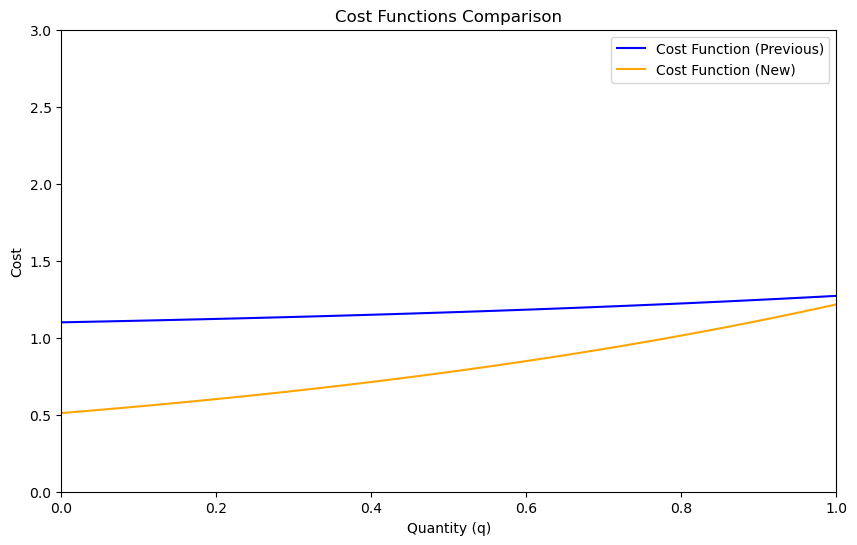

In [32]:
def cost_prev(q):
    return 1 + (1/10) * np.exp(q)

def cost_new(q):
    return (1/10) + 0.4108 * np.exp(q)

#plotting cost functions
q_values = np.linspace(0, 1, 100)
plt.figure(figsize=(10, 6))
plt.plot(q_values, cost_prev(q_values), label='Cost Function (Previous)', color='blue')
plt.plot(q_values, cost_new(q_values), label='Cost Function (New)', color='orange')
plt.title('Cost Functions Comparison')
plt.xlabel('Quantity (q)')
plt.ylabel('Cost')
plt.xlim(0, 1)
plt.ylim(0, 3)
plt.legend()
plt.show()